In [1]:
from __future__ import unicode_literals

In [2]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r',encoding='utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [3]:
arabic_doc = load_doc('des.txt')

In [4]:
doc = load_doc('Flickr8k_text/Flickr8k.token.txt')

In [5]:
print(len(arabic_doc.split('\n')),len(doc.split('\n')))

40460 40461


In [6]:
arabic_doc = arabic_doc.split('\n')
doc = doc.split('\n')

In [7]:
de = dict()
for i in range(len(arabic_doc)):
    if len(doc[i]) < 2:
        continue
    tokens = doc[i].split()
    img_id = tokens[0]
    img_id = img_id.split('.')[0]
    img_desc = arabic_doc[i]
    if img_id not in de:
        de[img_id] = []
    de[img_id].append(img_desc)

In [8]:
# -*- coding: utf8 -*-
import re
import pickle

In [9]:
# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text

In [10]:
for key, desc_list in de.items():
    for i in range(len(desc_list)):
        desc_list[i] = clean_str(desc_list[i])

In [14]:
import matplotlib.pyplot as plt
import random
import os
%matplotlib inline

In [15]:
vi = random.sample(os.listdir('Flickr8k_Dataset\Flicker8k_Dataset'),5)

In [16]:
vi

['3511062827_cd87871c67.jpg',
 '2053777548_108e54c826.jpg',
 '293879742_5fe0ffd894.jpg',
 '3411022255_210eefc375.jpg',
 '3666324102_18ecdf8253.jpg']

In [17]:
def view_img(i):
    plt.imshow(plt.imread('Flickr8k_Dataset\Flicker8k_Dataset\\'+vi[i]))
    for j in de[vi[i].split('.')[0]]:
        print(j)

كلب اسود سحب كائن ارجواني مع فمه
كلب اسود يسحب علي شيء
كلب يعض النسيج الارجواني
كلب اللعب مع لعبه ارجواني
الكلب الاسود هو سحب علي شيء الارجواني مع فمه


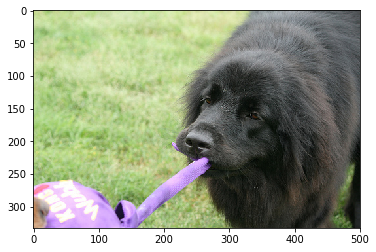

In [18]:
view_img(0)

كلب البني والابيض هو اصطياد كره تنس بينما كان واقفا علي رجليه الخلفيتين
كلب احمر يقفز مصيد كره تنس في فمه
جلود كلب القفز في الهواء مع كره تنس في فمه
يقفز كلب تان للقبض علي كره تنس
الكلب يقفز لالتقاط الكره


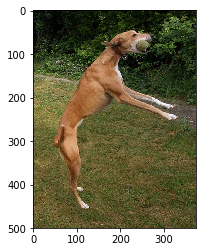

In [19]:
view_img(1)

كلب بني هو القفز فوق سياج والكلب اخر هو مطارده عليه
كلب بني يقفز فوق سياج اسلاك والكلب اخر يتبع له
كلب القفز من سور والكلب اخر علي العشب في الخلفيه
الكلب القفز عبر بوابه تليها الكلب اخر
كلب تان صغيره هو القفز فوق سياج سلسله مرتبطه


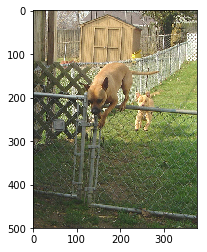

In [20]:
view_img(2)

مجموعه من الناس امام متجر سيرا علي الاقدام عبر ممر لمشاه
مجموعه من الاشخاص سيرا علي الاقدام عبر الشارع
اربعه اشخاص وطفل يتم عبور الشارع في ممر لمشاه
اربعه اشخاص وطفل يمشي في الشارع
الاشخاص الذين يعبرون الشارع


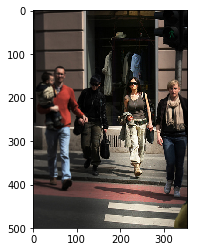

In [21]:
view_img(3)

فتاه وامراه تقفز الخروج من تلك التقلبات
القفز الانثين الخروج من التقلبات
اثنين من الفتيات القفز من التقلبات
ركوب الخيل في تقلبات اثنين من الفتيات
ارجوحه فتاتين علي سطح منقوشه حمراء


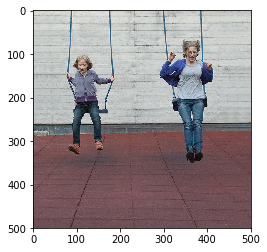

In [22]:
view_img(4)

In [23]:
import pickle

In [24]:
pickle.dump(de,open('pre_desc.pkl','wb'))